# ETL-- BIG MART SALES  Data

.

In [6]:
# To get started i will load the libraries needed :-
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for visualizations
%matplotlib inline 
# with 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code
import seaborn as sns #  for drawing attractive and informative statistical graphics.
    
    

Data Mining

In [159]:

df_train = pd.read_csv("./Big Mart SalesTrain.csv")
df_test = pd.read_csv("./Big Mart SalesTest.csv")


In [160]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [161]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Exploratory Data Analysis

In [162]:
# let's check the data dimensions
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [163]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [164]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [165]:
# Now lets first merge the train and test data for Exploratory Data Analysis

df_train['source'] = 'df_train'
df_test['source'] = 'df_test'
df_test['Item_Outlet_Sales'] = 0

data = pd.concat([df_train, df_test], sort = False)
print(df_train.shape, df_test.shape, data.shape)


(8523, 13) (5681, 13) (14204, 13)


In [166]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,df_train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,df_train


In [167]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

After merging the data we have 14204 rows and 13 columns of which 8 are categorical and 5 are numerical columns , now let's take a look at the categorical and numerical columns searately.

In [168]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,df_train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,df_train


In [169]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [170]:
# Find the Missing Values from the data Set
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

So the columns Item_Weight has 2439 missing values and outlet_Size has 4016 missing values that we will impute with the help of the mean and mode functions.

Data Cleaning and Imputing Missing Values
 

In [171]:
# I will create a pivot table with item identifier as index and weight as the value.
# The values parameter is the column you’d like to aggregate.
# index is the column, grouper, array you’d like to group your data by.

item_avg_weight = data.pivot_table(values ='Item_Weight', index ='Item_Identifier')
item_avg_weight.head()


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


So item_avg_weight gives the average weight for all the items which have been grouped by their unique identifiers.

In [172]:
# Create a variable that contains all the values from item_weight but as a boolean datatype indicating True for a 
# missing value and False for a filled value.

missing_values = data['Item_Weight'].isnull()

print('Missing values: %d' %sum(missing_values)) # The % operators in the string are replaced in order by the 
                                                 # elements in the tuple, %d is used for integers, 
                                                 # where as %s is used for strings


missing_values.head()


Missing values: 2439


0    False
1    False
2    False
3    False
4    False
Name: Item_Weight, dtype: bool

In [173]:

# impute the missing values using the apply function that will fill the missing weights with
# the average weight for each item that we calculated earlier in item_avg_weight.

imputed_weight = data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].\
                 apply(lambda x: item_avg_weight.at[x,'Item_Weight'])


# apply takes a function and applies it to all values of pandas series.
# lambda function is used for creating small, one-time and anonymous function objects in Python.    
# .at will access a single value at a time in a series or dataframe

print('Missing values after imputation %d' %sum(data['Item_Weight'].isnull()))

imputed_weight.head(20)


Missing values after imputation 0


7      19.000
18      8.260
21      8.315
23     15.500
29     14.500
36     20.200
38      6.385
39     15.250
49     10.195
59      5.940
62      6.215
63     15.500
64     17.500
77     13.350
83     18.850
84     12.600
87     20.200
95      7.930
98     12.150
101    20.600
Name: Item_Identifier, dtype: float64

As we can see all the missing values in Item_Weight in the dataframe have been filled and now we have 14204 filled rows of Item_Weight .

In [174]:
# To impute the Mode for Outlet_Size I will use mode function from scipy library

# Import mode function:
from scipy.stats import mode


In [175]:
# Determing the mode or the most popular value for each outlet type will give the most repeated value for each outlet
# type and that can fill our missing outlet_Size values.

outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', \
                                    aggfunc = (lambda x: mode(x.astype('str')).mode[0]))


print ('Mode for each Outlet_Type:\n')

print (outlet_size_mode)
# [1 rows x 4 columns]


Mode for each Outlet_Type:

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [176]:
#Get a boolean variable specifying missing Item_Weight values

missing_vals = data['Outlet_Size'].isnull() 

missing_vals.head()

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool

In [177]:
#Impute data and check missing values before and after imputation to confirm

print ('Orignal no of missing values: %d'  %sum(missing_vals))

imputed_size = data.loc[missing_vals,'Outlet_Size'] \
             = data.loc[missing_vals,'Outlet_Type'].\
               apply(lambda x: outlet_size_mode[x])


print("Missing values after imputation :" , sum(data['Outlet_Size'].isnull()))



Orignal no of missing values: 4016
Missing values after imputation : 0


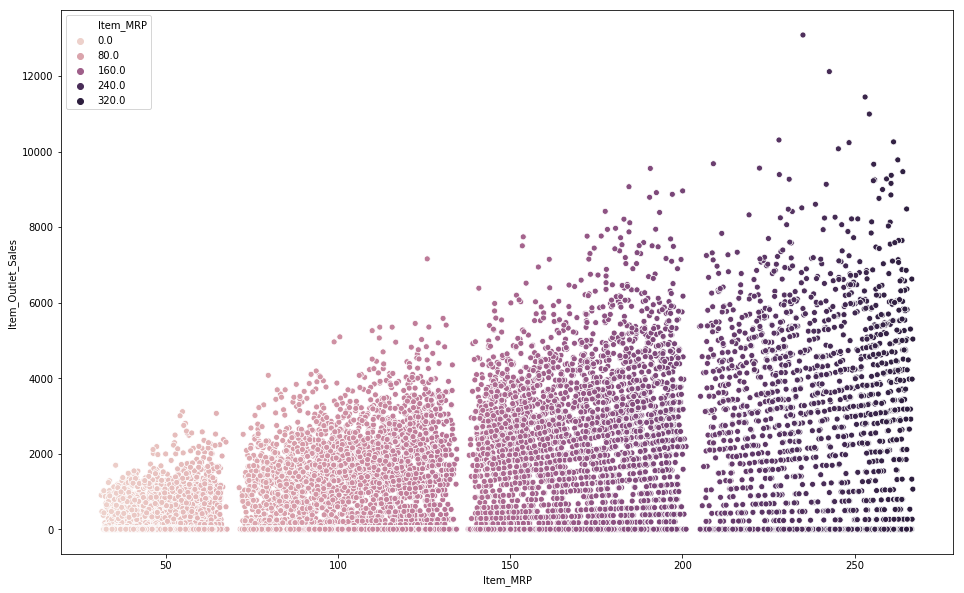

In [144]:
# I will now plot the data 

fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.scatterplot( "Item_MRP" ,"Item_Outlet_Sales" , data = data , hue = "Item_MRP")


We can see that the 50 , 100 dollar MRP is the most sold and thus most dense , after which 150-200 MRP is somewhat lesser sold and the items above 200 usd are the least dense or least data points.

In [178]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.065953,141.004977,1997.830681,1308.865489
std,4.651716,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Modify Item_Visibility

I noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.


In [179]:
# Determine average visibility of a product by aggregating the visibility in a pivot table

visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

visibility_avg.head()


,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [181]:
# Impute 0 values with mean visibility of that product:
# Create a variable that will hold all the values from Item_Visibility in a booolean data type.

missing_values = ( data['Item_Visibility'] == 0 )

missing_values.head()


0    False
1    False
2    False
3     True
4     True
Name: Item_Visibility, dtype: bool

In [182]:
# Impute missing values using the apply function that will fill the missing visibility with
# the average visibility for each item that we calculated earlier in visibility_avg.


print ('Number of 0 values initially: %d' %sum(missing_values))

imputed_visibility = data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].\
                     apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

print ('Number of 0 values after modification: %d' %sum(data['Item_Visibility'] == 0))



Number of 0 values initially: 879
Number of 0 values after modification: 0


/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


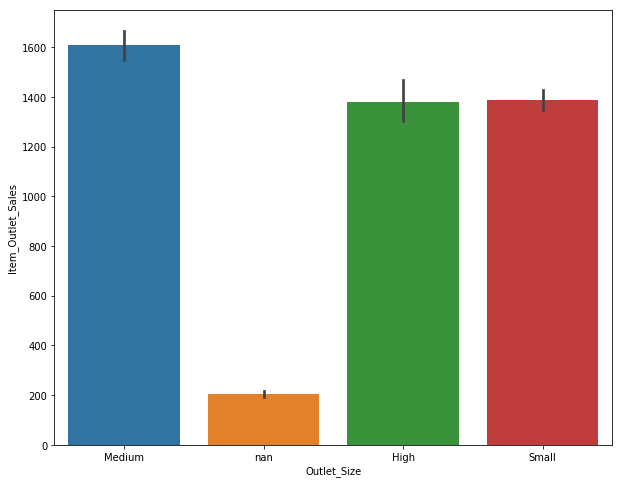

In [139]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.barplot( x = "Outlet_Size", y = "Item_Outlet_Sales", data = data)


Medium sized outlets are doing the maximum sales followed by high and small at an even rate.

/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


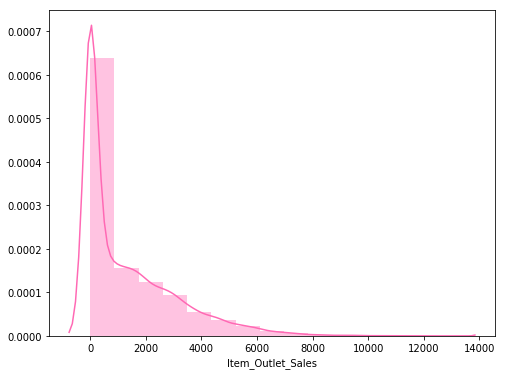

In [155]:
fig = plt.gcf()
fig.set_size_inches(8, 6)

sns.distplot(data["Item_Outlet_Sales"], color = "hotpink", bins =15)

The Sales are skewed in nature.

[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

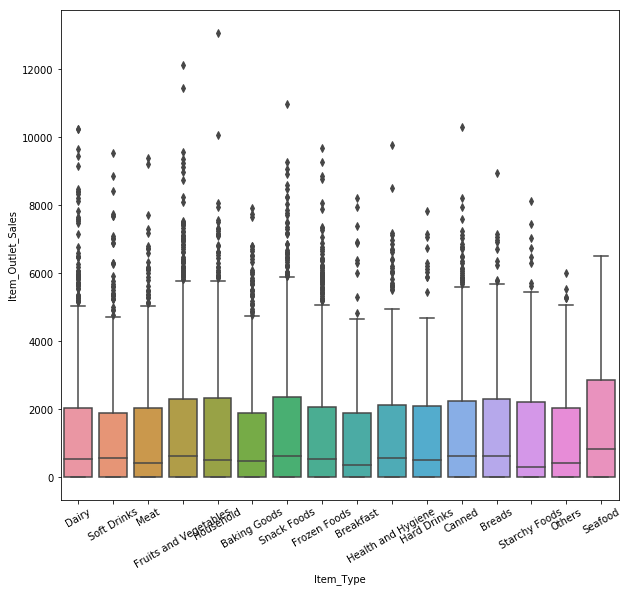

In [154]:
plt.figure(figsize = (10,9))

ax = sns.boxplot(x = 'Item_Type', y ='Item_Outlet_Sales', data = data)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)



The plot shows that sales for  meats , fruits n vegetables , dairy , snacks is high whereas seafood has the least sales.

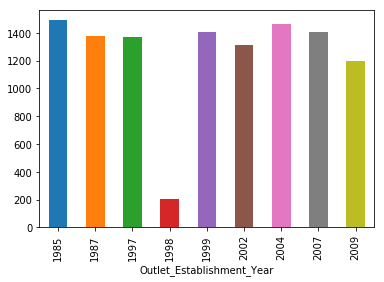

In [183]:
# To group the data by the establishment year and the outlet sales

data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()


Sales look to be highest for the establishment that started in almost the same year's except for the year 1998.

In [186]:
# Now the data is cleaned and analyzed so i will store it to a database but before that let's check the cleaned data

clean_data = data
clean_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,df_train
4,NCD19,8.930,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,df_train
5,FDP36,10.395,Regular,0.057059,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,df_train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,df_train
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,df_train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,df_train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,df_train


In [195]:
# Convert to csv file

clean_data.to_csv('etl_data.csv', index = False)


In [ ]:
# I will create a table called etl in my local postgres database with the following query :
    
    CREATE TABLE etl( Item_Identifier character varying(45) NOT NULL , 
                      Item_Weight FLOAT NOT NULL , 
                      Item_Fat_Content character varying(45) NOT NULL,
                      Item_Visibility FLOAT NOT NULL , Item_Type character varying(45) NOT NULL, 
                      Item_MRP FLOAT NOT NULL ,
                      Outlet_Identifier character varying(45) NOT NULL,
                      Outlet_Establishment_Year INTEGER NOT NULL, 
                      Outlet_Size character varying(45) NOT NULL, 
                      Outlet_Location_Type character varying(45) NOT NULL,
                      Outlet_Type character varying(45) NOT NULL, 
                      Item_Outlet_Sale FLOAT NOT NULL, 
                      source character varying(45) NOT NULL


);

    
# and once the table is created i will simply import my csv into the etl table.  

Loading the data into a local postgres database to make sql queries

In [2]:
# Import the craete_engine function sqlalchemy library

from sqlalchemy import create_engine


In [3]:
# Connect to the local database
from engine connectionetl import connection


/Users/nehatalwar/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
engine.table_names()

['etl']

In [7]:
# Confirm data has been added by querying the etl table stored in postgres database

pd.read_sql_query('select * from etl', con = engine).head() 


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sale,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,df_train
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,df_train


Let's try some queries from the database

In [9]:
query1 = engine.execute("SELECT * FROM etl WHERE item_mrp >= 250;")
for record in query1:
    print(record)
    

('FDN22', 18.85, 'Regular', 0.138190277, 'Snack Foods', 250.8724, 'OUT013', 1987, 'High', 'Tier 3', 'Supermarket Type1', 3775.086, 'df_train')
('FDP33', 18.7, 'Low Fat', 0.0930934742, 'Snack Foods', 256.6672, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 3068.0064, 'df_train')
('FDC02', 21.35, 'Low Fat', 0.069102831, 'Canned', 259.9278, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 6768.5228, 'df_train')
('FDV49', 10.0, 'Low Fat', 0.025879577, 'Canned', 265.2226, 'OUT045', 2002, 'Small', 'Tier 2', 'Supermarket Type1', 5815.0972, 'df_train')
('FDY45', 17.5, 'Low Fat', 0.026015519, 'Snack Foods', 255.8356, 'OUT027', 1985, 'Medium', 'Tier 3', 'Supermarket Type3', 2543.356, 'df_train')
('NCZ18', 7.825, 'low fat', 0.186357148, 'Household', 254.3698, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 5580.7356, 'df_train')
('FDL58', 5.78, 'Regular', 0.074264356, 'Snack Foods', 264.7568, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 4745.8224, 'df_train'

In [221]:
query2 = engine.execute("SELECT * FROM etl WHERE item_type = 'Dairy' ;")
for q in query2:
    print(q)

('FDA15', 9.3, 'Low Fat', 0.016047301, 'Dairy', 249.8092, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 3735.138, 'df_train')
('FDA03', 18.5, 'Regular', 0.045463773, 'Dairy', 144.1102, 'OUT046', 1997, 'Small', 'Tier 1', 'Supermarket Type1', 2187.153, 'df_train')
('FDU02', 13.35, 'Low Fat', 0.10249212, 'Dairy', 230.5352, 'OUT035', 2004, 'Small', 'Tier 2', 'Supermarket Type1', 2748.4224, 'df_train')
('FDE51', 5.925, 'Regular', 0.161466534, 'Dairy', 45.5086, 'OUT010', 1998, 'nan', 'Tier 3', 'Grocery Store', 178.4344, 'df_train')
('FDV38', 19.25, 'Low Fat', 0.170348551, 'Dairy', 55.7956, 'OUT010', 1998, 'nan', 'Tier 3', 'Grocery Store', 163.7868, 'df_train')
('FDU02', 13.35, 'Low Fat', 0.102511504, 'Dairy', 230.6352, 'OUT046', 1997, 'Small', 'Tier 1', 'Supermarket Type1', 3435.528, 'df_train')
('FDM39', 6.42, 'LF', 0.089498926, 'Dairy', 178.1002, 'OUT010', 1998, 'nan', 'Tier 3', 'Grocery Store', 358.2004, 'df_train')
('FDS02', 10.195, 'Regular', 0.255394896, 'Dairy', 196.8794, '

In [17]:
query3 = engine.execute("SELECT * FROM etl WHERE outlet_size = 'Medium' ;")
for q in query3:
    print(q)
    

('FDA15', 9.3, 'Low Fat', 0.016047301, 'Dairy', 249.8092, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 3735.138, 'df_train')
('DRC01', 5.92, 'Regular', 0.019278216, 'Soft Drinks', 48.2692, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 443.4228, 'df_train')
('FDN15', 17.5, 'Low Fat', 0.016760075, 'Meat', 141.618, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 2097.27, 'df_train')
('FDP36', 10.395, 'Regular', 0.057058688875, 'Baking Goods', 51.4008, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 556.6088, 'df_train')
('FDP10', 19.0, 'Low Fat', 0.127469857, 'Snack Foods', 107.7622, 'OUT027', 1985, 'Medium', 'Tier 3', 'Supermarket Type3', 4022.7636, 'df_train')
('FDY07', 11.8, 'Low Fat', 0.0406265244444444, 'Fruits and Vegetables', 45.5402, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 1516.0266, 'df_train')
('FDX32', 15.1, 'Regular', 0.1000135, 'Fruits and Vegetables', 145.4786, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 

('FDL36', 15.1, 'Low Fat', 0.076193763, 'Baking Goods', 89.783, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 2247.075, 'df_train')
('FDV19', 14.85, 'Regular', 0.035311852, 'Fruits and Vegetables', 160.9578, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 4813.734, 'df_train')
('FDR44', 6.11, 'Regular', 0.103080901, 'Fruits and Vegetables', 131.2968, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 1957.452, 'df_train')
('FDA15', 9.3, 'Low Fat', 0.015944801, 'Dairy', 249.5092, 'OUT027', 1985, 'Medium', 'Tier 3', 'Supermarket Type3', 6474.2392, 'df_train')
('FDA23', 9.8, 'Low Fat', 0.047260402, 'Baking Goods', 102.8016, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 1922.8304, 'df_train')
('FDA45', 21.25, 'Low Fat', 0.156012631, 'Snack Foods', 177.337, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 2822.992, 'df_train')
('FDC50', 15.85, 'Low Fat', 0.135836915, 'Canned', 93.8094, 'OUT027', 1985, 'Medium', 'Tier 3', 'Supermarket Type3', 3237

('NCO14', 9.6, 'Low Fat', 0.029689961, 'Household', 45.7086, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 0.0, 'df_test')
('DRJ35', 10.1, 'Low Fat', 0.046358964, 'Hard Drinks', 62.3878, 'OUT027', 1985, 'Medium', 'Tier 3', 'Supermarket Type3', 0.0, 'df_test')
('FDR26', 20.7, 'Low Fat', 0.042903378, 'Dairy', 176.2028, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 0.0, 'df_test')
('NCY54', 8.43, 'Low Fat', 0.1784187, 'Household', 171.1422, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 0.0, 'df_test')
('FDE21', 12.8, 'Low Fat', 0.023038155, 'Fruits and Vegetables', 114.1492, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 0.0, 'df_test')
('NCB19', 6.525, 'Low Fat', 0.090663534, 'Household', 86.1882, 'OUT018', 2009, 'Medium', 'Tier 3', 'Supermarket Type2', 0.0, 'df_test')
('FDP27', 8.155, 'Low Fat', 0.119636353, 'Meat', 187.853, 'OUT049', 1999, 'Medium', 'Tier 1', 'Supermarket Type1', 0.0, 'df_test')
('FDM03', 12.65, 'Low Fat', 0.123222078, 'Meat',

Thus the process of extraction , transformation and loading is complete and the data can be used for querying and all C.R.U.D operations as well.